In [1]:
import math
import matplotlib.pyplot as plt
import random
pourcentage = 15
iAgent = 1
iMaxAgent = 10

In [2]:
def getTabFile(f):
    fp = open(f,'r')
    line = fp.readline()
    d = dict()
    i = 0
    while line:
        if not('R' in line):
            comb,val = line.split(" ") 
            d[comb]=val
        line = fp.readline()
    fp.close()
    return d


def findValueInFile(f,val):
    fp = open(f,'r')
    line = fp.readline()
    while line:
        if(val in line):
            comb,val = line.split(" ")
            fp.close()
            return val
        line = fp.readline()

    fp.close()
    return -1




In [17]:

def calcShapley(iAgent,iMaxAgent,pourcentage = 100):
    dic = dict()
    for i in range(1,10):
        fName = "ResultatEval"+str(i)+".txt"
        dic[i] = getTabFile(fName)
        
    calcMargFile = open("CalculContribMarginaleRSV"+str(pourcentage)+"_Totaltxt","w")
    agent = ['R','B','C','H']
    comb=[]
    k=dic.keys()

    for r in range(3):
        for c in range(3):
            for b in range(3):
                for h in range(3):
                    if(h+r+c+b==0):
                        comb.append( [1,b,c,h])
                    else:
                        comb.append( [r,b,c,h])
    val = []
    for ag in range(len(agent)):
        somme = 0
        for co in comb:
            toFind6 = str(co[0])+"/"+str(co[1])+"/"+str(co[2])+"/"+str(co[3])
            n = co[0]+co[1]+co[2]+co[3]
            cn = int(dic[n][toFind6])
            toFind7 = str(co[0]+int(ag==0))+"/"+str(co[1]+int(ag==1))+"/"+str(co[2]+int(ag==2))+"/"+str(co[3]+int(ag==3))
            n2=co[0]+int(ag==0)+co[1]+int(ag==1)+co[2]+int(ag==2)+co[3]+int(ag==3)
            cn1 = int(dic[n2][toFind7])
            somme+=(cn1-cn)
        somme = somme/(math.factorial(len(agent))*(pourcentage/100))
        print("contribMarg de "+str(agent[ag])+" : " +str(somme)+"\n")
        calcMargFile.write(str(agent[ag])+" " +str(somme)+"\n")
        val.append(somme)
    calcMargFile.close()

    plt.bar([1,2,3,4],val)
    plt.xticks([1,2,3,4],agent)
    plt.show()


contribMarg de R : -15.000000000000002

contribMarg de B : 90.55555555555557

contribMarg de C : 93.8888888888889

contribMarg de H : 100.83333333333334



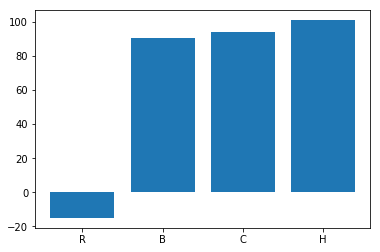

In [18]:
calcShapley(iAgent,iMaxAgent,pourcentage)